#Validating the methodology on PIMA Dataset


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats


pid=pd.read_csv(r'/content/drive/MyDrive/pima-indians-diabetes (1).csv')

pid

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
for i in pid.columns:
  print(i,pid[i].skew())

Pregnancies 0.9016739791518588
Glucose 0.17375350179188992
BloodPressure  -1.8436079833551302
SkinThickness 0.10937249648187608
Insulin 2.272250858431574
BMI -0.42898158845356543
DiabetesPedigreeFunction  1.919911066307204
Age 1.1295967011444805
Outcome 0.635016643444986


In [ ]:
import numpy as np
pid['Insulin'] = pid['Insulin'].apply(lambda x: np.power(x,1/2))
pid['Insulin'].skew()
pid['BloodPressure '] = pid['BloodPressure '].apply(lambda x: np.power(x,2))
pid['BloodPressure '].skew()
pid['BMI'] = pid['BMI'].apply(lambda x: np.power(x,2))
pid['BMI'].skew()
pid['DiabetesPedigreeFunction '] = pid['DiabetesPedigreeFunction '].apply(lambda x: np.power(x,1/2))
pid['DiabetesPedigreeFunction '].skew()

0.9018017197488095

In [ ]:
X1=pid.iloc[:,:-1]

In [ ]:
Y1=pid.iloc[:,-1]

In [ ]:
from sklearn.metrics import precision_score
from imblearn.metrics import specificity_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler

                           Pregnancies   Glucose  BloodPressure   \
Pregnancies                   1.000000  0.129459        0.175320   
Glucose                       0.129459  1.000000        0.193076   
BloodPressure                 0.175320  0.193076        1.000000   
SkinThickness                -0.081672  0.057328        0.142755   
Insulin                      -0.118077  0.238519        0.029217   
BMI                          -0.000498  0.216395        0.286708   
DiabetesPedigreeFunction     -0.030336  0.127247        0.029468   
Age                           0.544341  0.263514        0.293206   
Outcome                       0.221898  0.466581        0.113143   

                           SkinThickness   Insulin       BMI  \
Pregnancies                    -0.081672 -0.118077 -0.000498   
Glucose                         0.057328  0.238519  0.216395   
BloodPressure                   0.142755  0.029217  0.286708   
SkinThickness                   1.000000  0.535045  0.384862   

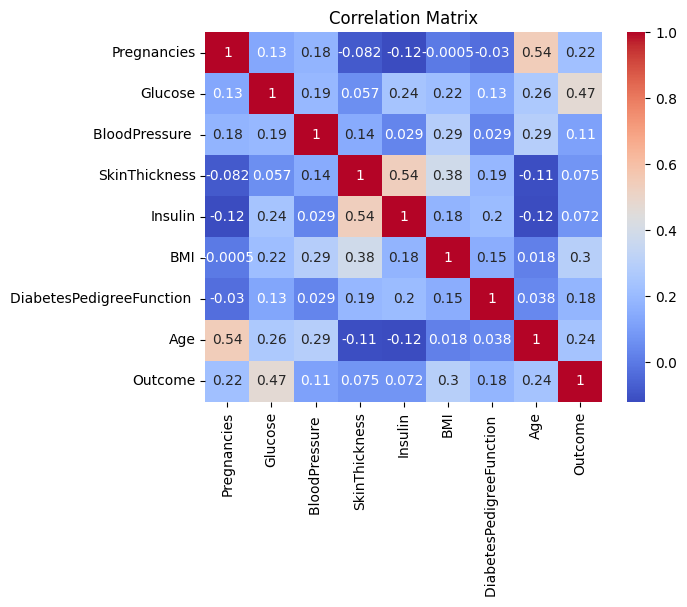

In [ ]:
import pandas as pd
import numpy as np

# Create a synthetic dataset

# Calculate the correlation matrix
correlation_matrix = pid.corr()

# Print the correlation matrix
print(correlation_matrix)

# Optional: Use seaborn to visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV


from sklearn.model_selection import cross_val_score,KFold
from sklearn.naive_bayes import GaussianNB



sm = SMOTE()
x, y= sm.fit_resample(X1, Y1.ravel())


scaler = StandardScaler()
X = scaler.fit_transform(x)

for i in range(0,200,1):
  print("Results for random state:" , i)
  x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.20, random_state= i )
  gb = GaussianNB()
  gnb=gb.fit(x_train, y_train)

  y_pred= gb.predict(x_test)

  print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
  from sklearn.metrics import classification_report
  print(classification_report(y_test, y_pred))
  print('Recall: %.3f' % recall_score(y_test, y_pred))
  print('Precision: %.3f' % precision_score(y_test, y_pred))
  print('F1 Score: %.3f' % f1_score(y_test, y_pred))
  print('Specificity Score:' , specificity_score(y_test, y_pred, average='weighted'))
  print('ROC AUC score: %.3f' % roc_auc_score(y_train, gb.predict_proba(x_train)[:, 1]), end='\n')


Results for random state: 0
Model accuracy score with criterion entropy: 0.7550
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       105
           1       0.76      0.72      0.74        95

    accuracy                           0.76       200
   macro avg       0.76      0.75      0.75       200
weighted avg       0.76      0.76      0.75       200

Recall: 0.716
Precision: 0.756
F1 Score: 0.735
Specificity Score: 0.7512656641604011
ROC AUC score: 0.824
Results for random state: 1
Model accuracy score with criterion entropy: 0.7050
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       111
           1       0.66      0.70      0.68        89

    accuracy                           0.70       200
   macro avg       0.70      0.70      0.70       200
weighted avg       0.71      0.70      0.71       200

Recall: 0.697
Precision: 0.660
F1 Score: 0.678
Specificity Score: 0.703340925194

In [ ]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV


from sklearn.model_selection import cross_val_score,KFold
from sklearn.naive_bayes import GaussianNB



sm = SMOTE()
x, y= sm.fit_resample(X1, Y1.ravel())


scaler = StandardScaler()
X = scaler.fit_transform(x)

for i in range(0,200,1):
  print("Results for random state:" , i)
  x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.20, random_state= i )
  gb = GaussianNB()
  gnb=gb.fit(x_train, y_train)

  y_pred= gb.predict(x_test)

  print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
  from sklearn.metrics import classification_report
  print(classification_report(y_test, y_pred))
  print('Recall: %.3f' % recall_score(y_test, y_pred))
  print('Precision: %.3f' % precision_score(y_test, y_pred))
  print('F1 Score: %.3f' % f1_score(y_test, y_pred))
  print('Specificity Score:' , specificity_score(y_test, y_pred, average='weighted'))
  print('ROC AUC score: %.3f' % roc_auc_score(y_train, gb.predict_proba(x_train)[:, 1]), end='\n')


Results for random state: 0
Model accuracy score with criterion entropy: 0.8000
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       105
           1       0.78      0.80      0.79        95

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200

Recall: 0.800
Precision: 0.784
F1 Score: 0.792
Specificity Score: 0.8
ROC AUC score: 0.815
Results for random state: 1
Model accuracy score with criterion entropy: 0.7150
              precision    recall  f1-score   support

           0       0.76      0.71      0.73       111
           1       0.67      0.72      0.69        89

    accuracy                           0.71       200
   macro avg       0.71      0.72      0.71       200
weighted avg       0.72      0.71      0.72       200

Recall: 0.719
Precision: 0.667
F1 Score: 0.692
Specificity Score: 0.7158128353072172
ROC AUC sc

In [ ]:
from collections import Counter

print(Counter(Y1))

Counter({0: 500, 1: 268})


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

sm = SMOTE()
x, y= sm.fit_resample(X1, Y1.ravel())


scaler = StandardScaler()
X = scaler.fit_transform(x)

for i in range(1,200,1):
  print("Results for random state:", i)
  x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.20, random_state= i)
  from sklearn.linear_model import LogisticRegression
  lr = LogisticRegression()
  lr.fit(x_train, y_train)


  y_pred= lr.predict(x_test)
  print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
  from sklearn.metrics import classification_report
  print(classification_report(y_test, y_pred))
  print('Recall: %.3f' % recall_score(y_test, y_pred))
  print('Precision: %.3f' % precision_score(y_test, y_pred))
  print('F1 Score: %.3f' % f1_score(y_test, y_pred))
  print('Specificity Score ' , specificity_score(y_test, y_pred, average= 'weighted'))
  print('ROC AUC score: %.3f' % roc_auc_score(y_train, lr.predict_proba(x_train)[:, 1]))

Results for random state: 1
Model accuracy score with criterion entropy: 0.7450
              precision    recall  f1-score   support

           0       0.82      0.69      0.75       111
           1       0.68      0.81      0.74        89

    accuracy                           0.74       200
   macro avg       0.75      0.75      0.74       200
weighted avg       0.76      0.74      0.75       200

Recall: 0.809
Precision: 0.679
F1 Score: 0.738
Specificity Score  0.7576824577386375
ROC AUC score: 0.846
Results for random state: 2
Model accuracy score with criterion entropy: 0.7500
              precision    recall  f1-score   support

           0       0.70      0.78      0.74        91
           1       0.80      0.72      0.76       109

    accuracy                           0.75       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.75      0.75      0.75       200

Recall: 0.725
Precision: 0.798
F1 Score: 0.760
Specificity Score  0.754990422421

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

sm = SMOTE()
x, y= sm.fit_resample(X1, Y1.ravel())


scaler = StandardScaler()
X = scaler.fit_transform(x)
for i in range(0,100,1):
  print("Results for random state:" , i)
  x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.20, random_state=i)
  from sklearn.tree import DecisionTreeClassifier
  dt= DecisionTreeClassifier(criterion='entropy')
  dt.fit(x_train, y_train)

  y_pred= dt.predict(x_test)
  print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
  from sklearn.metrics import classification_report
  print(classification_report(y_test, y_pred))
  print('Recall: %.3f' % recall_score(y_test, y_pred))
  print('Precision: %.3f' % precision_score(y_test, y_pred))
  print('F1 Score: %.3f' % f1_score(y_test, y_pred))
  print('Specificity Score ' , specificity_score(y_test, y_pred, average='weighted'))
  print('ROC AUC score: %.3f' % roc_auc_score(y_train, dt.predict_proba(x_train)[:, 1]))

Results for random state: 0
Model accuracy score with criterion entropy: 0.7500
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       105
           1       0.74      0.74      0.74        95

    accuracy                           0.75       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.75      0.75      0.75       200

Recall: 0.737
Precision: 0.737
F1 Score: 0.737
Specificity Score  0.7487468671679198
ROC AUC score: 1.000
Results for random state: 1
Model accuracy score with criterion entropy: 0.7600
              precision    recall  f1-score   support

           0       0.82      0.72      0.77       111
           1       0.70      0.81      0.75        89

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.77      0.76      0.76       200

Recall: 0.809
Precision: 0.699
F1 Score: 0.750
Specificity Score  0.769709484765

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

sm = SMOTE()
x, y= sm.fit_resample(X1, Y1.ravel())


scaler = StandardScaler()
X = scaler.fit_transform(x)

for i in range(1,100,1):
  print("Results for random state:" , i)
  x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=i)
  from sklearn import svm
  sv = svm.SVC(kernel= 'rbf' ,probability=True)
  sv.fit(x_train, y_train)
  y_pred = sv.predict(x_test)

  print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
  from sklearn.metrics import classification_report
  print(classification_report(y_test, y_pred))
  print('Recall: %.3f' % recall_score(y_test, y_pred))
  print('Precision: %.3f' % precision_score(y_test, y_pred))
  print('F1 Score: %.3f' % f1_score(y_test, y_pred))
  print('Specificity Score: ' , specificity_score(y_test, y_pred, average='weighted'))
  print('ROC AUC score: %.3f' % roc_auc_score(y_train, sv.predict_proba(x_train)[:, 1]))

Results for random state: 1
Model accuracy score with criterion entropy: 0.7600
              precision    recall  f1-score   support

           0       0.84      0.70      0.76       111
           1       0.69      0.83      0.76        89

    accuracy                           0.76       200
   macro avg       0.77      0.77      0.76       200
weighted avg       0.77      0.76      0.76       200

Recall: 0.831
Precision: 0.692
F1 Score: 0.755
Specificity Score:  0.7741633768600061
ROC AUC score: 0.920
Results for random state: 2
Model accuracy score with criterion entropy: 0.7800
              precision    recall  f1-score   support

           0       0.76      0.76      0.76        91
           1       0.80      0.80      0.80       109

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200

Recall: 0.798
Precision: 0.798
F1 Score: 0.798
Specificity Score:  0.7764068958

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

sm = SMOTE(random_state=9)
x, y= sm.fit_resample(X1, Y1.ravel())


scaler = StandardScaler()
X = scaler.fit_transform(x)

for i in range(100,300,1):
  print("Results for random state:" , i)
  x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=i)
  from sklearn.ensemble import RandomForestClassifier
  rfc= RandomForestClassifier(criterion='entropy', random_state=0)
  rfc.fit(x_train, y_train)

  y_pred= rfc.predict(x_test)
  print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
  from sklearn.metrics import classification_report
  print(classification_report(y_test, y_pred))
  print('Recall: %.3f' % recall_score(y_test, y_pred))
  print('Precision: %.3f' % precision_score(y_test, y_pred))
  print('F1 Score: %.3f' % f1_score(y_test, y_pred))
  print('Specificity Score:' , specificity_score(y_test, y_pred, average='weighted'))
  print('ROC AUC score: %.3f' % roc_auc_score(y_train, rfc.predict_proba(x_train)[:, 1]))

Results for random state: 100
Model accuracy score with criterion entropy: 0.8100
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       104
           1       0.78      0.83      0.81        96

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200

Recall: 0.833
Precision: 0.784
F1 Score: 0.808
Specificity Score: 0.8117948717948719
ROC AUC score: 1.000
Results for random state: 101
Model accuracy score with criterion entropy: 0.8000
              precision    recall  f1-score   support

           0       0.79      0.77      0.78        91
           1       0.81      0.83      0.82       109

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200

Recall: 0.826
Precision: 0.811
F1 Score: 0.818
Specificity Score: 0.79491884

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn import feature_selection as fs
select = fs.SelectKBest(fs.f_classif, k=8)
x_n = select.fit_transform(X1,Y1)
x_n.shape
cols = select.get_support(indices=True)
db1 = pid.iloc[:,cols]

['Glucose' 'BMI' 'Age' 'Pregnancies' 'DiabetesPedigreeFunction '
 'BloodPressure ' 'SkinThickness' 'Insulin']
[213.16175218  74.16431404  46.14061124  39.67022739  25.94429927
   9.93303243   4.30438091   4.02996876]
1.Glucose
2.BMI
3.Age
4.Pregnancies
5.DiabetesPedigreeFunction 
6.BloodPressure 
7.SkinThickness
8.Insulin


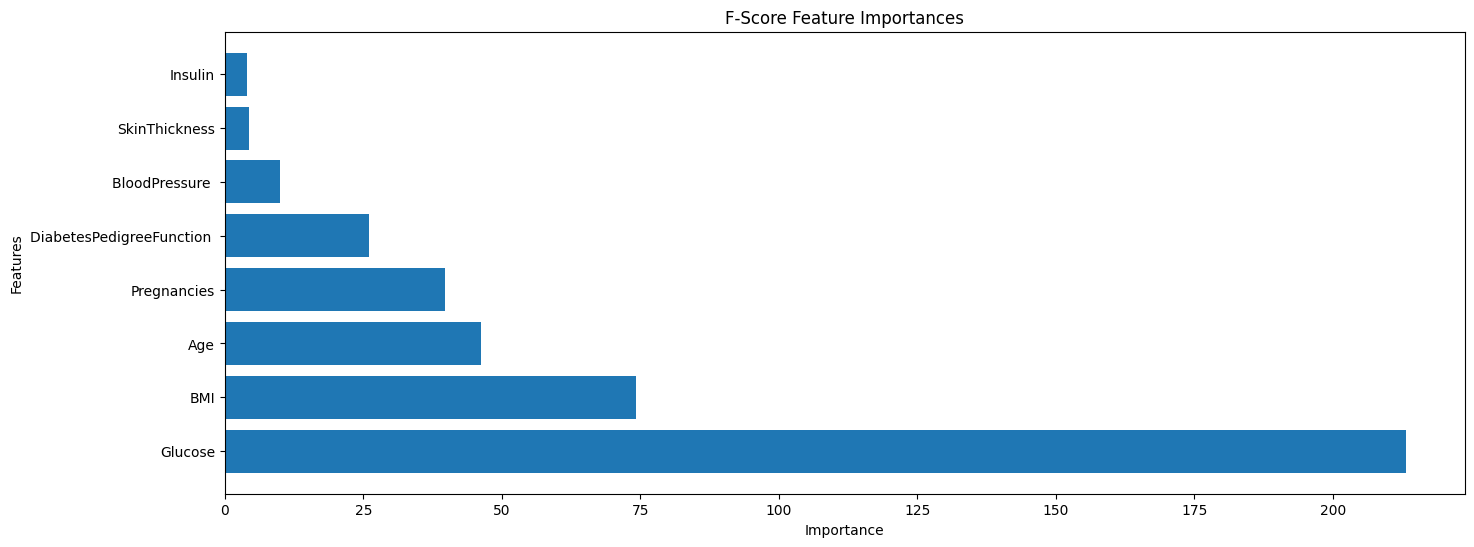

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fs_indices_fscore = np.argsort(np.nan_to_num(select.scores_))[::-1][0:8]
fs_indices_fscore

best_features_fscore = pid.columns[fs_indices_fscore].values
print(best_features_fscore)
feature_importances_fscore = select.scores_[fs_indices_fscore]
print(feature_importances_fscore)

for i,each in enumerate(best_features_fscore,start=1):
    print ("{}.{}".format(i,each))

def plot_imp(best_features, scores, method_name):
    plt.figure(figsize=[16,6])
    plt.barh(best_features, scores)
    plt.title(method_name + ' Feature Importances')
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

plot_imp(best_features_fscore[:], feature_importances_fscore[:], 'F-Score')

In [ ]:
import pickle

with open('rfc_xai', 'wb') as files:
    pickle.dump(rfc, files)

with open('rfc_xai' , 'rb') as f:
    rfc = pickle.load(f)


#Using XAI techniques to explain predictions on PIMA dataset



In [ ]:
!pip install shap
import shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 6.0 MB/s eta 0:00:00


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [ ]:
pid

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,5184,35,0.000000,1128.96,0.791833,50,1
1,1,85,4356,29,0.000000,707.56,0.592453,31,0
2,8,183,4096,0,0.000000,542.89,0.819756,32,1
3,1,89,4356,23,9.695360,789.61,0.408656,21,0
4,0,137,1600,35,12.961481,1857.61,1.512614,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,5776,48,13.416408,1082.41,0.413521,63,0
764,2,122,4900,27,0.000000,1354.24,0.583095,27,0
765,5,121,5184,23,10.583005,686.44,0.494975,30,0
766,1,126,3600,0,0.000000,906.01,0.590762,47,1


In [ ]:
x_test
x_test = pd.DataFrame(x_test,columns=X1.columns)

In [ ]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.291594,-0.798370,-0.262604,0.169313,0.428643,-0.252620,1.502687,-0.533564
1,-0.904832,0.473375,1.203322,0.947465,0.163760,0.361926,1.648687,0.612937
2,-1.211450,-1.084513,-0.262604,0.752927,1.276745,0.959278,-0.206594,-0.798141
3,0.934880,1.141042,1.039815,-1.322146,-0.961339,-0.404554,-1.217324,1.142091
4,-0.598213,-0.448640,-0.743728,-1.322146,-0.961339,-0.890007,-0.357880,-0.974526
5,-1.211450,-0.003529,-0.262604,-1.322146,-0.961339,-1.045924,-0.989029,-1.150910
6,3.081211,1.586153,-0.629085,0.623235,-0.961339,0.013673,-0.957601,0.348360
7,0.628262,0.155439,-0.918042,-0.479147,-0.228754,-0.119294,1.098536,-0.445371
8,2.467974,-1.052719,-0.629085,-0.868224,1.519374,-0.736195,1.445806,0.877514
9,2.161355,-0.162497,0.571846,1.077157,0.930187,1.362148,1.080465,1.230284


In [ ]:
# Fits the explainer
explainer = shap.Explainer(lr.predict, x_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(x)

shap_values_test = explainer(x_test)

fn=shap_values.feature_names

#shap.plots.bar(shap_values)

print("SHAP Version : {}".format(shap.__version__))

Exact explainer: 1001it [00:29, 34.36it/s]                          


SHAP Version : 0.42.1


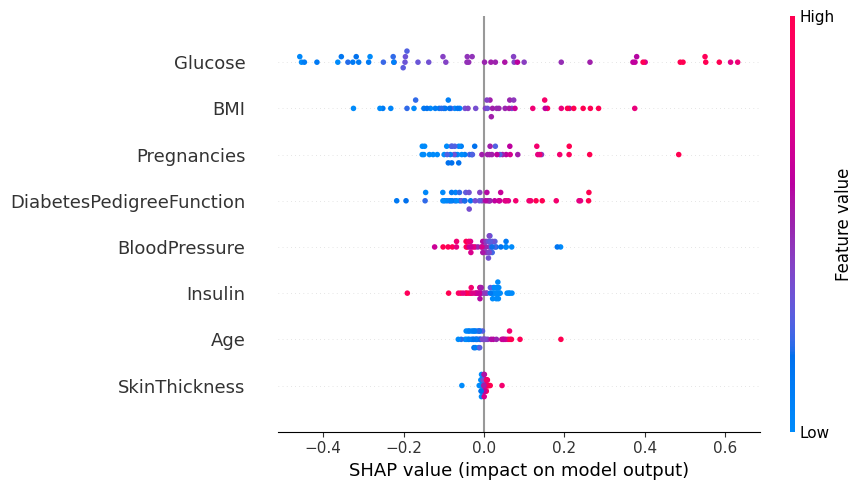

Size: [6.4 4.8]
Size: [8.6 5. ]


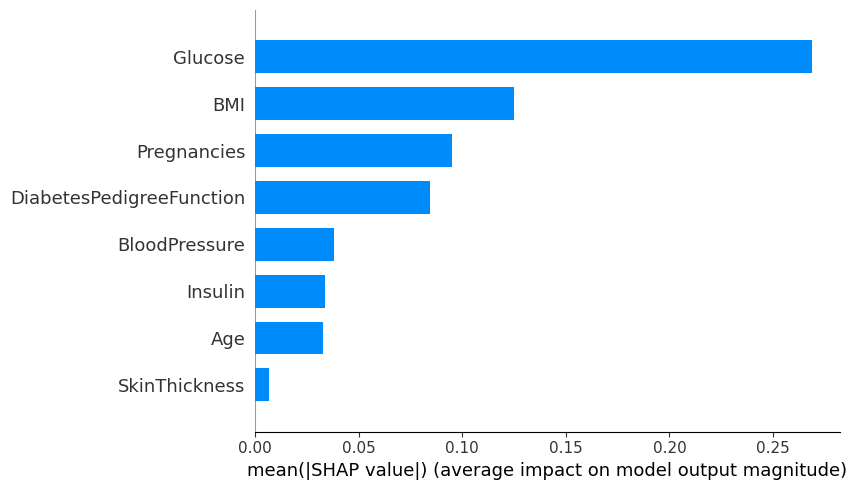

In [ ]:
shap.summary_plot(shap_values_test,  class_names={0:'Non-diabetic', 1:'Diabetic'},feature_names = ['Pregnancies',	'Glucose',	'BloodPressure'	,'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction',	'Age'], plot_size=[9,5] )
print(f'Size: {plt.gcf().get_size_inches()}')
shap.summary_plot(shap_values_test,  show= False,    plot_type='bar',  class_names={0:'se', 1:'dia'},feature_names = ['Pregnancies',	'Glucose',	'BloodPressure'	,'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction',	'Age'],plot_size = [8.6,5])
print(f'Size: {plt.gcf().get_size_inches()}')

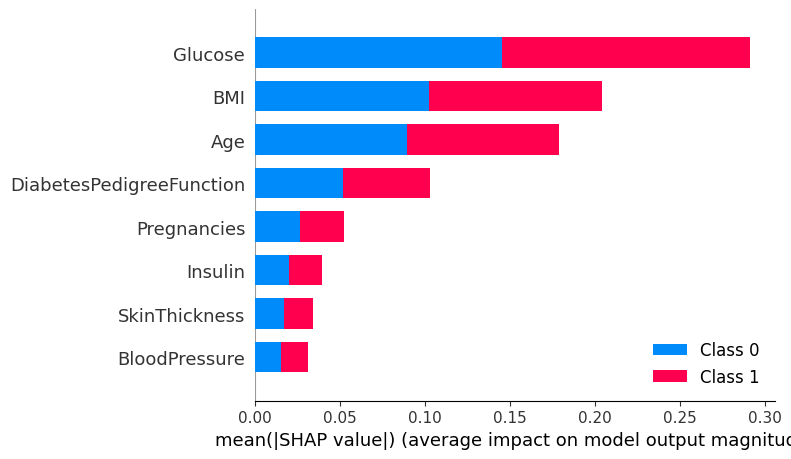

Size: [6.4 4.8]


<Figure size 640x480 with 0 Axes>

In [ ]:
shap.summary_plot(shap_values_test, feature_names = ['Pregnancies',	'Glucose',	'BloodPressure'	,'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction',	'Age'])
print(f'Size: {plt.gcf().get_size_inches()}')
#shap.summary_plot(shap_values, feature_names = ['Pregnancies',	'Glucose',	'BloodPressure'	,'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction',	'Age'])

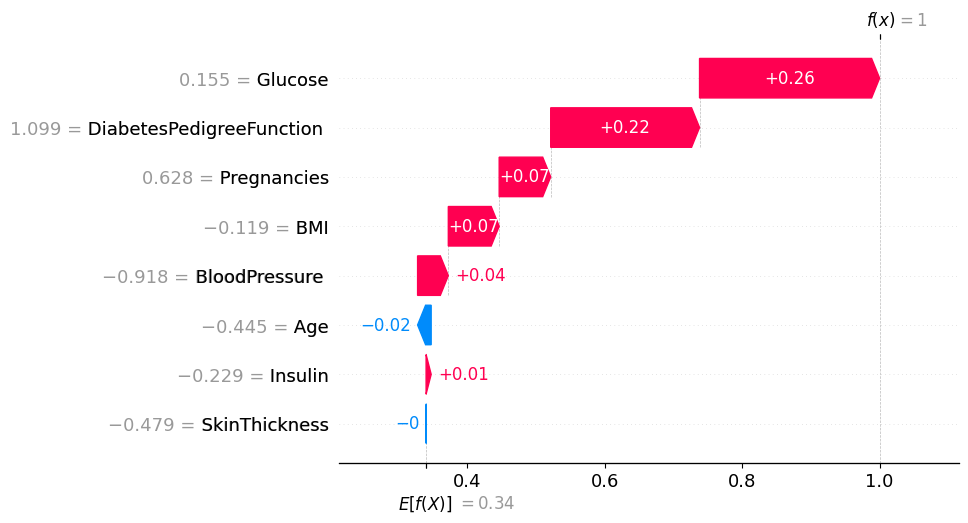

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


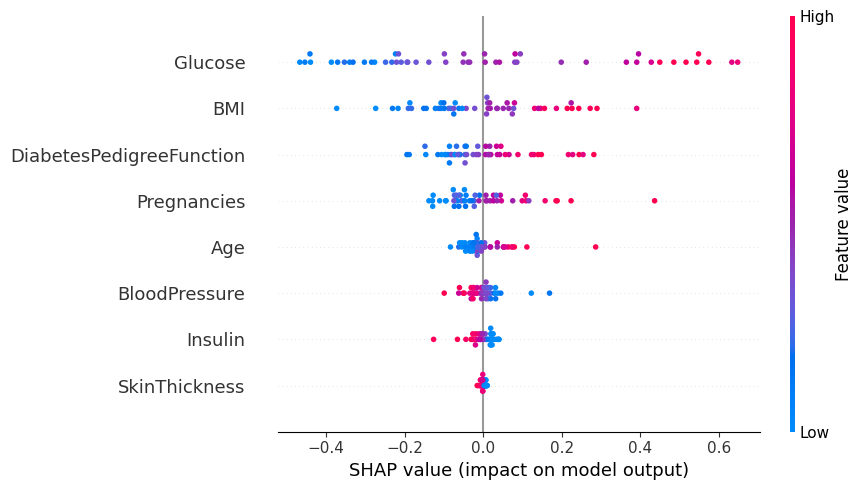

Size: [6.4 4.8]


<Figure size 640x480 with 0 Axes>

In [ ]:
#shap.plots.waterfall(shap_values[7])
shap.plots.waterfall(shap_values_test[7])
shap.summary_plot(shap_values_test,  class_names={0:'Non-diabetic', 1:'Diabetic'},feature_names = ['Pregnancies',	'Glucose',	'BloodPressure'	,'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction',	'Age'], plot_size=[9,5] )
print(f'Size: {plt.gcf().get_size_inches()}')

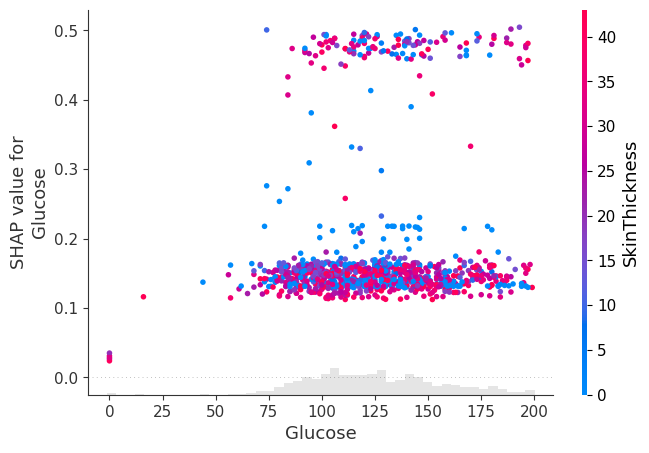

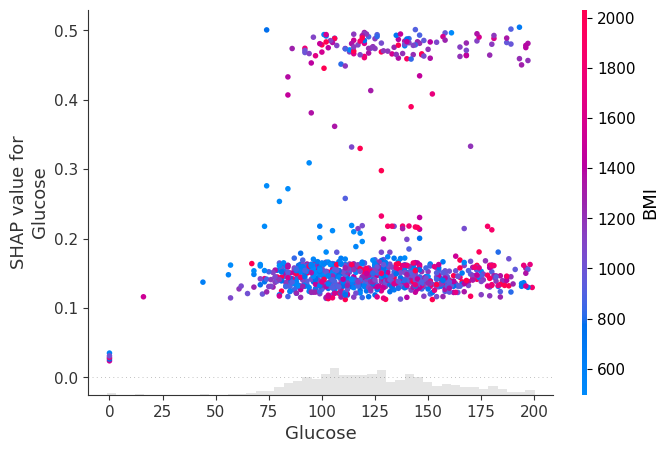

In [ ]:
shap.plots.scatter(shap_values[:,'Glucose'], color=shap_values[:, "SkinThickness"])
#shap.plots.scatter(shap_values[:,'Glucose'], color=shap_values[:, "Insulin"])
shap.plots.scatter(shap_values[:,'Glucose'], color=shap_values[:, "BMI"])
#shap.plots.scatter(shap_values[:,'Glucose'], color=shap_values[:, "DiabetesPedigreeFunction "])

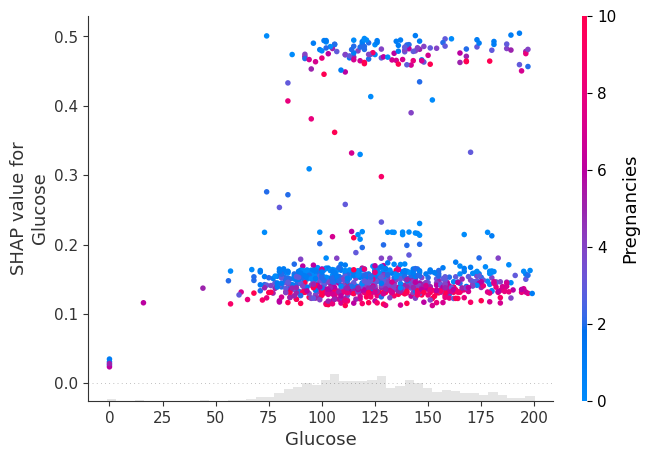

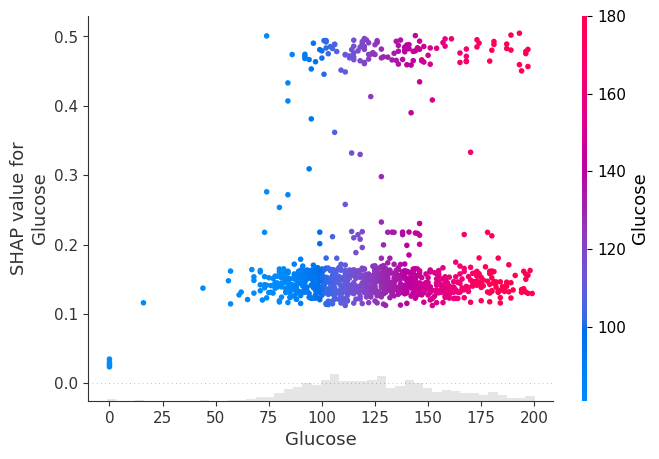

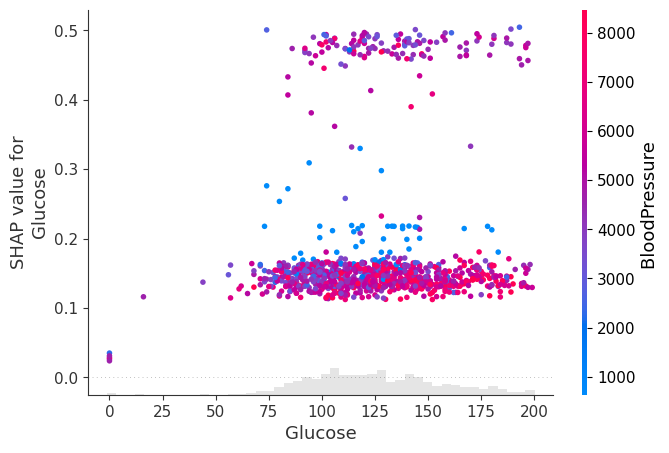

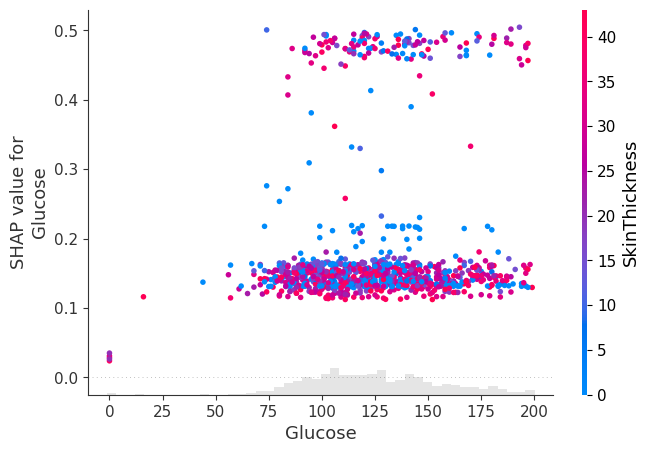

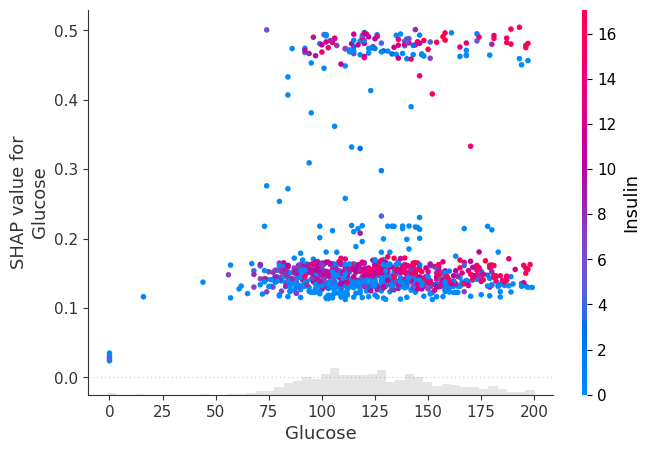

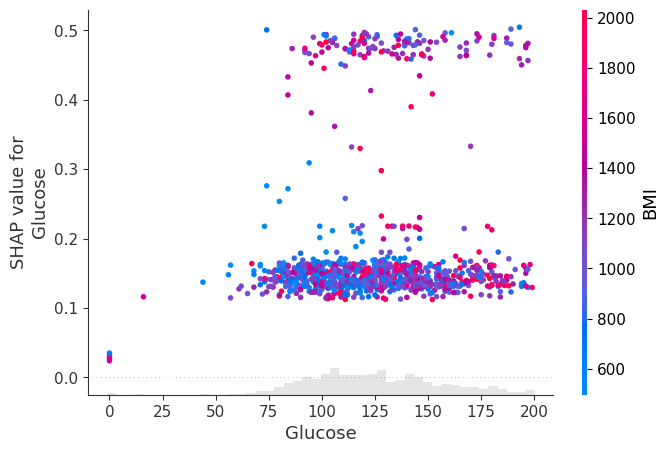

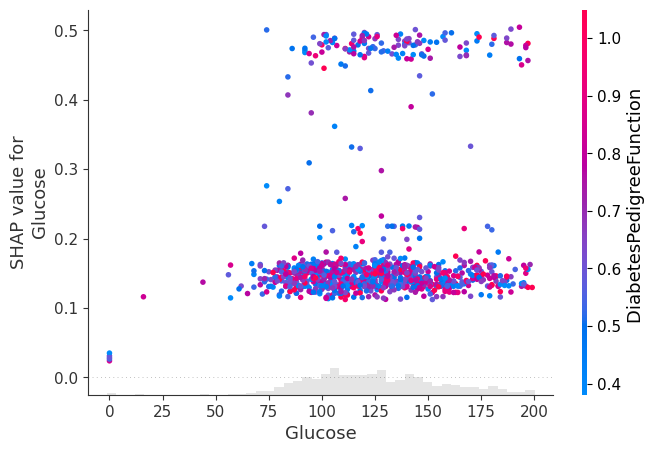

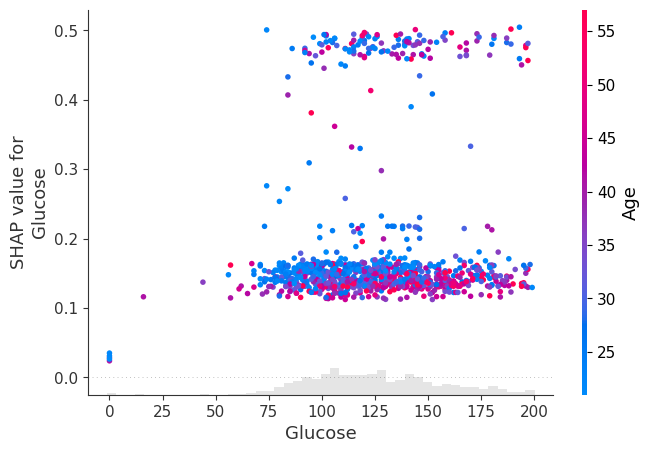

In [ ]:
for i in X1.columns:
  shap.plots.scatter(shap_values[:,'Glucose'], color=shap_values[:, i])

In [ ]:
%out[9] 66

UsageError: Line magic function `%out[9]` not found.


In [ ]:
# Fits the explainer
explainer = shap.TreeExplainer(rfc)
# Calculates the SHAP values - It takes some time
shap_values_test = explainer.shap_values(x_test)

shap_values = explainer.shap_values(x)
print("SHAP Version : {}".format(shap.__version__))

SHAP Version : 0.42.1


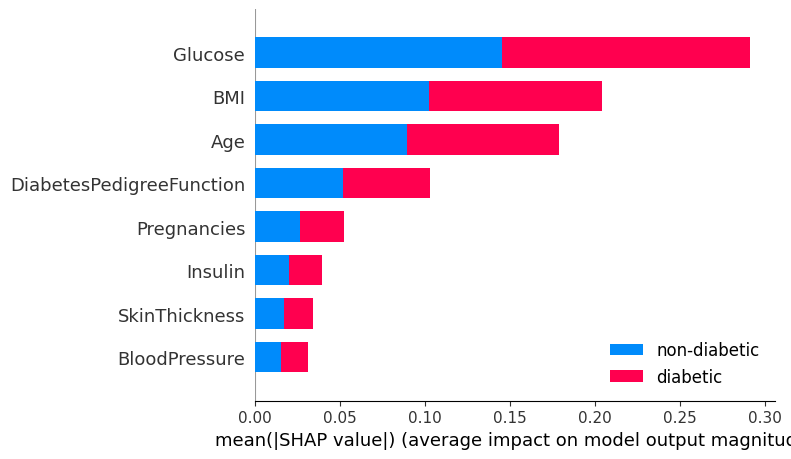

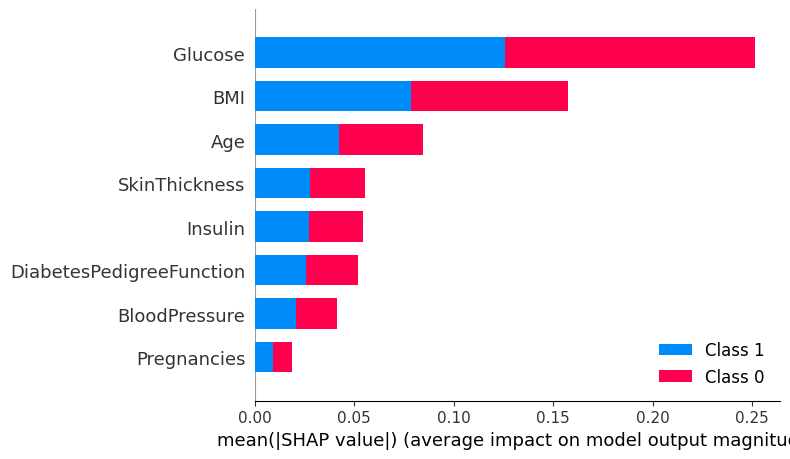

In [ ]:
shap.summary_plot(shap_values_test,  class_names={0:'non-diabetic', 1:'diabetic'},feature_names = ['Pregnancies',	'Glucose',	'BloodPressure'	,'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction',	'Age'])

shap.summary_plot(shap_values, feature_names = ['Pregnancies',	'Glucose',	'BloodPressure'	,'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction',	'Age'])


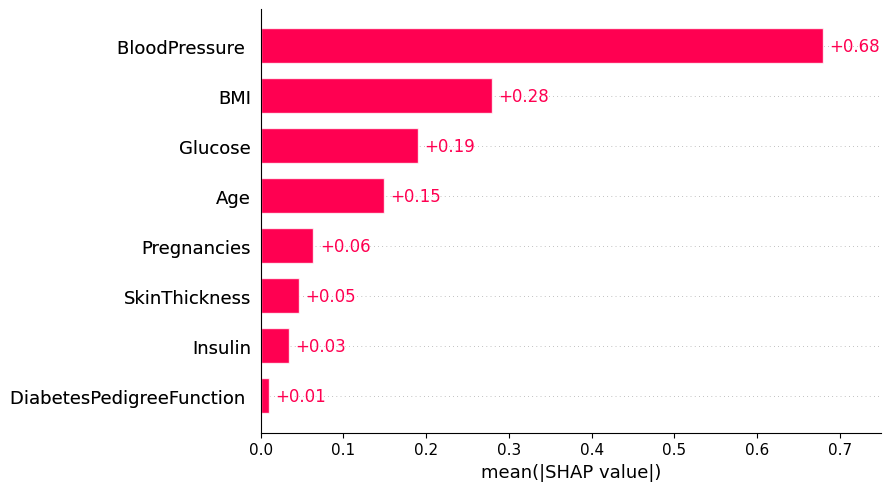

In [ ]:
shap.plots.bar(shap_values, max_display=12)

In [ ]:
ft= X1.columns

In [ ]:
print(dt.feature_importances_)
for col,score in zip(ft,dt.feature_importances_):
    print('%s, %0.3f ' %(col,score))

[0.05893386 0.27009916 0.09273674 0.05068695 0.05126012 0.23177884
 0.11682324 0.12768108]
Pregnancies, 0.059 
Glucose, 0.270 
BloodPressure , 0.093 
SkinThickness, 0.051 
Insulin, 0.051 
BMI, 0.232 
DiabetesPedigreeFunction , 0.117 
Age, 0.128 
